In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
#cardioData = pd.read_csv('test.csv').drop('age', axis=1)
cardioData = pd.read_csv('cardio.csv').drop('age', axis=1)

cardioData.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year,cardio_bool
0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,50,N
1,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,55,Y
2,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52,Y
3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48,Y
4,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,61,N


In [10]:
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53691 entries, 0 to 53690
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       53691 non-null  int64  
 1   height       53691 non-null  int64  
 2   weight       53691 non-null  float64
 3   ap_hi        53691 non-null  int64  
 4   ap_lo        53691 non-null  int64  
 5   cholesterol  53691 non-null  int64  
 6   gluc         53691 non-null  int64  
 7   smoke        53691 non-null  int64  
 8   alco         53691 non-null  int64  
 9   active       53691 non-null  int64  
 10  cardio       53691 non-null  int64  
 11  BMI          53691 non-null  float64
 12  year         53691 non-null  int64  
 13  cardio_bool  53691 non-null  object 
dtypes: float64(2), int64(11), object(1)
memory usage: 5.7+ MB


In [11]:
cardioData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year
count,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000
mean,1.348066,164.683895,73.337685,126.160958,81.664581,1.349388,1.219776,0.084800,0.051256,0.804008,0.493770,27.097754,53.393101
std,0.476361,6.251403,10.613325,13.461812,7.445915,0.670269,0.568212,0.278587,0.220522,0.396966,0.499966,4.093898,6.705242
min,1.000000,152.000000,55.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.358919,30.000000
25%,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.951227,49.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.259585,54.000000
75%,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.666548,58.000000
max,2.000000,178.000000,100.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,43.282548,65.000000


<AxesSubplot: >

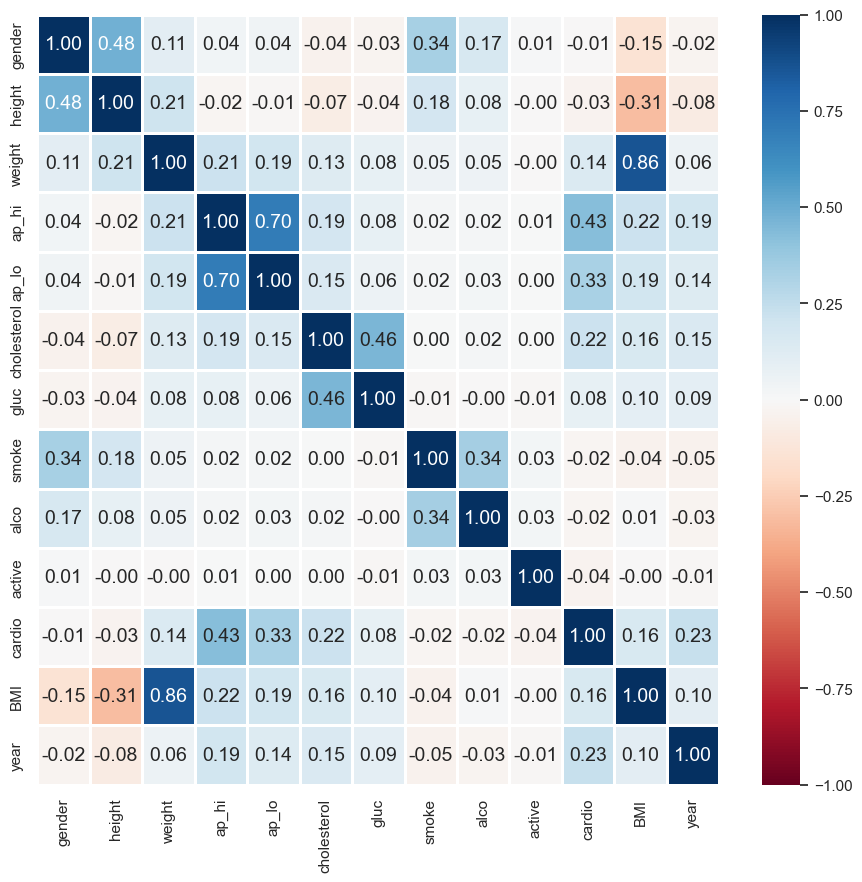

In [12]:
f, axes = plt.subplots(1, 1, figsize=(11, 10))
sb.heatmap(cardioData.drop('cardio_bool', axis=1).corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

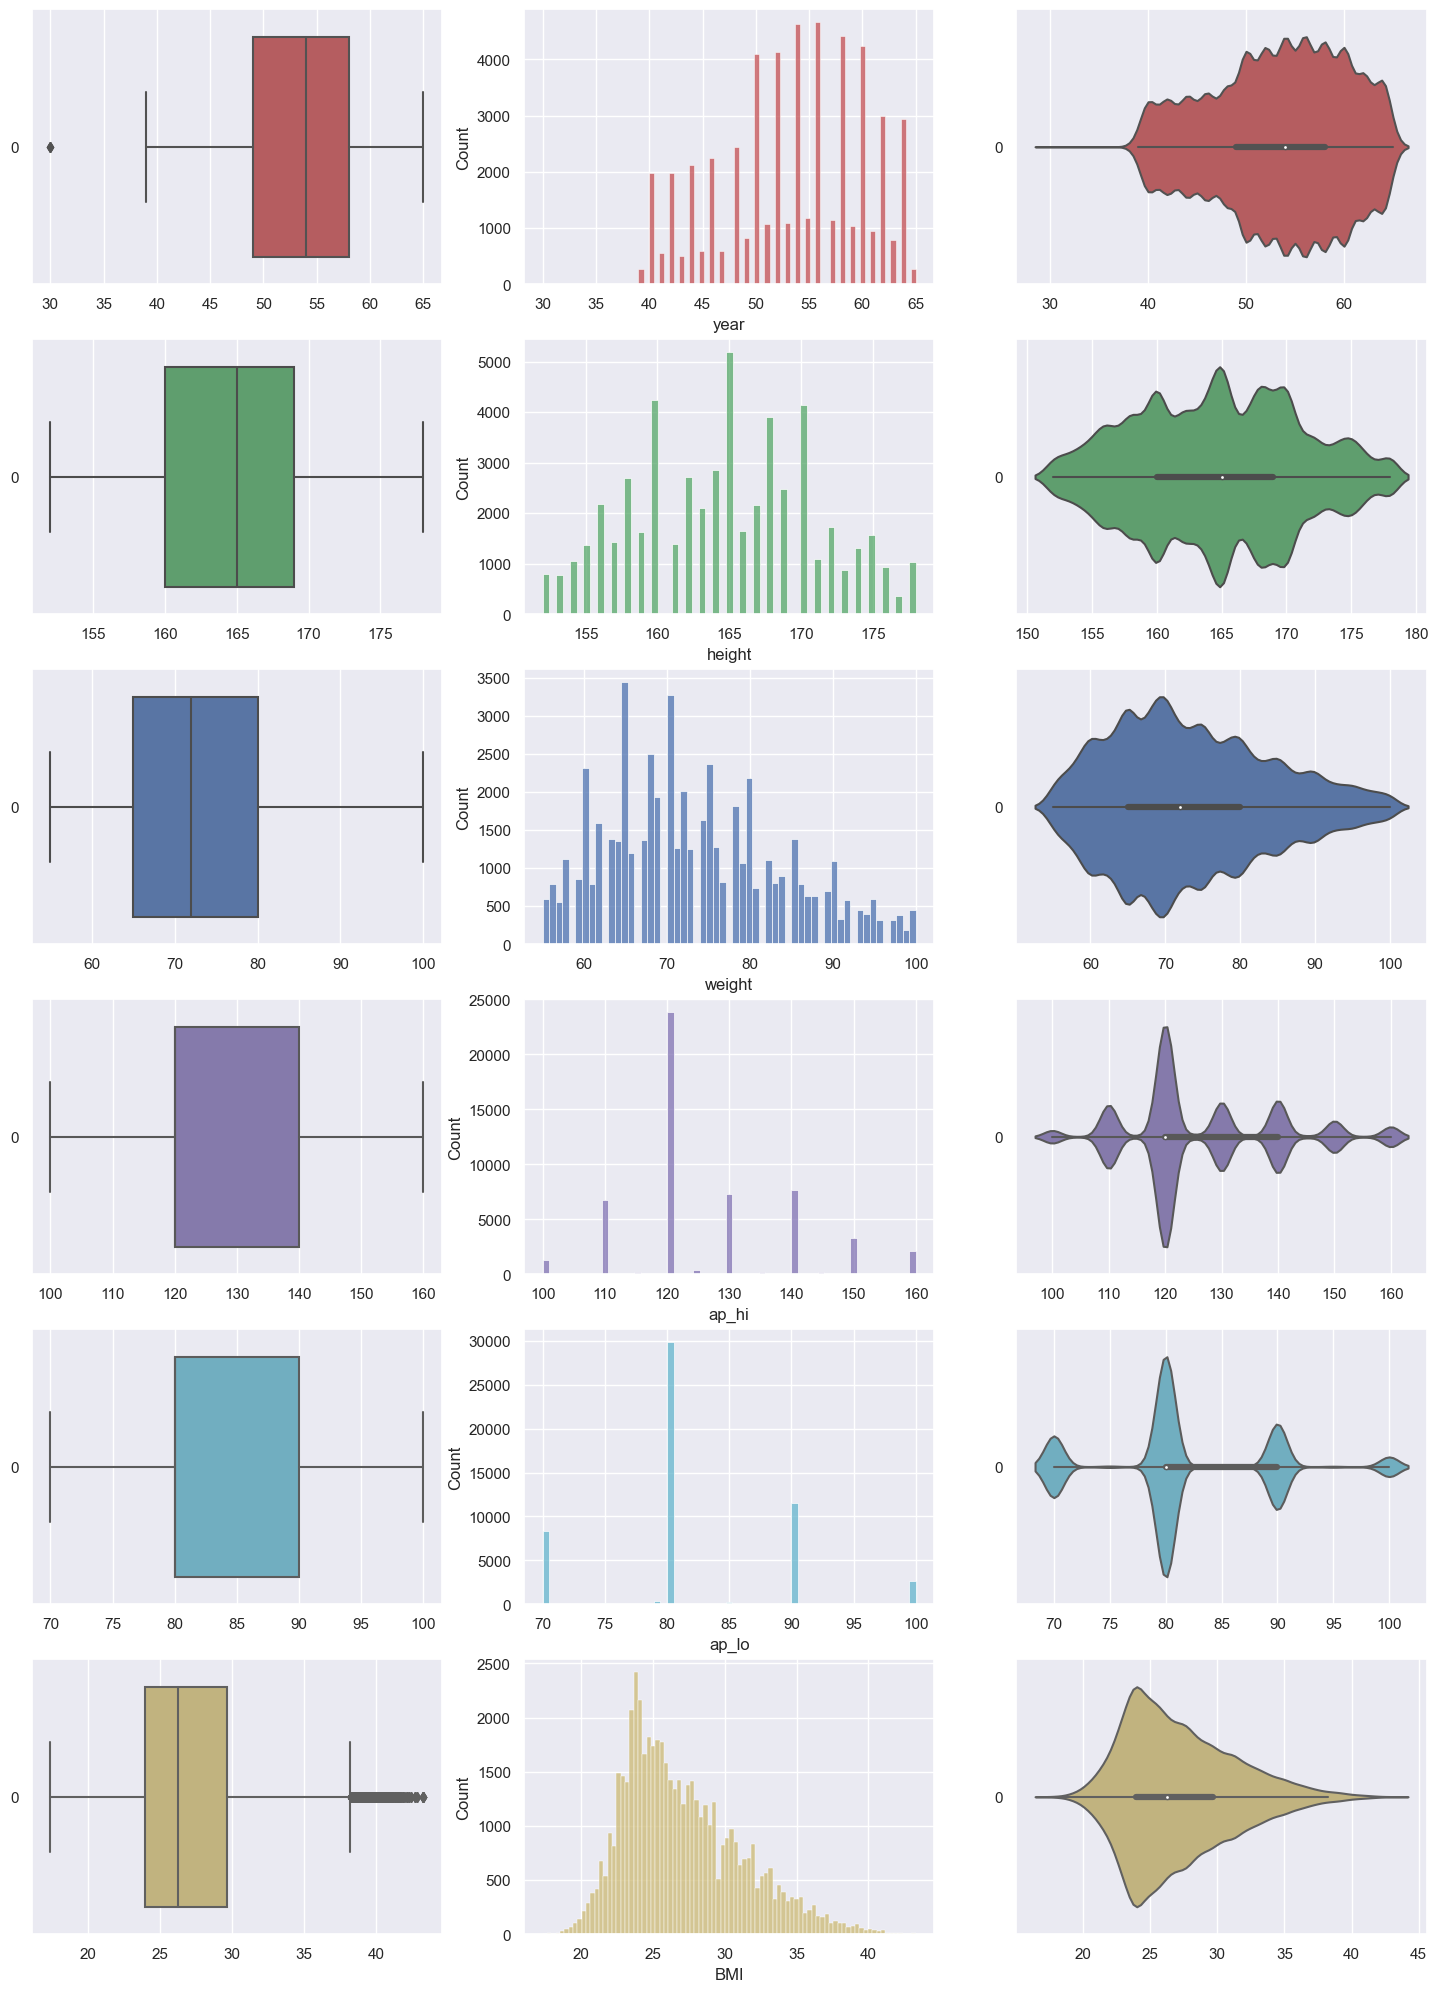

In [13]:
cardioNumData = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']])

f, axes = plt.subplots(6, 3, figsize=(18, 25))
colors = ["r", "g", "b", "m", "c" , "y"]

count = 0
for var in cardioNumData:
    sb.boxplot(data=cardioNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=cardioNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=cardioNumData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

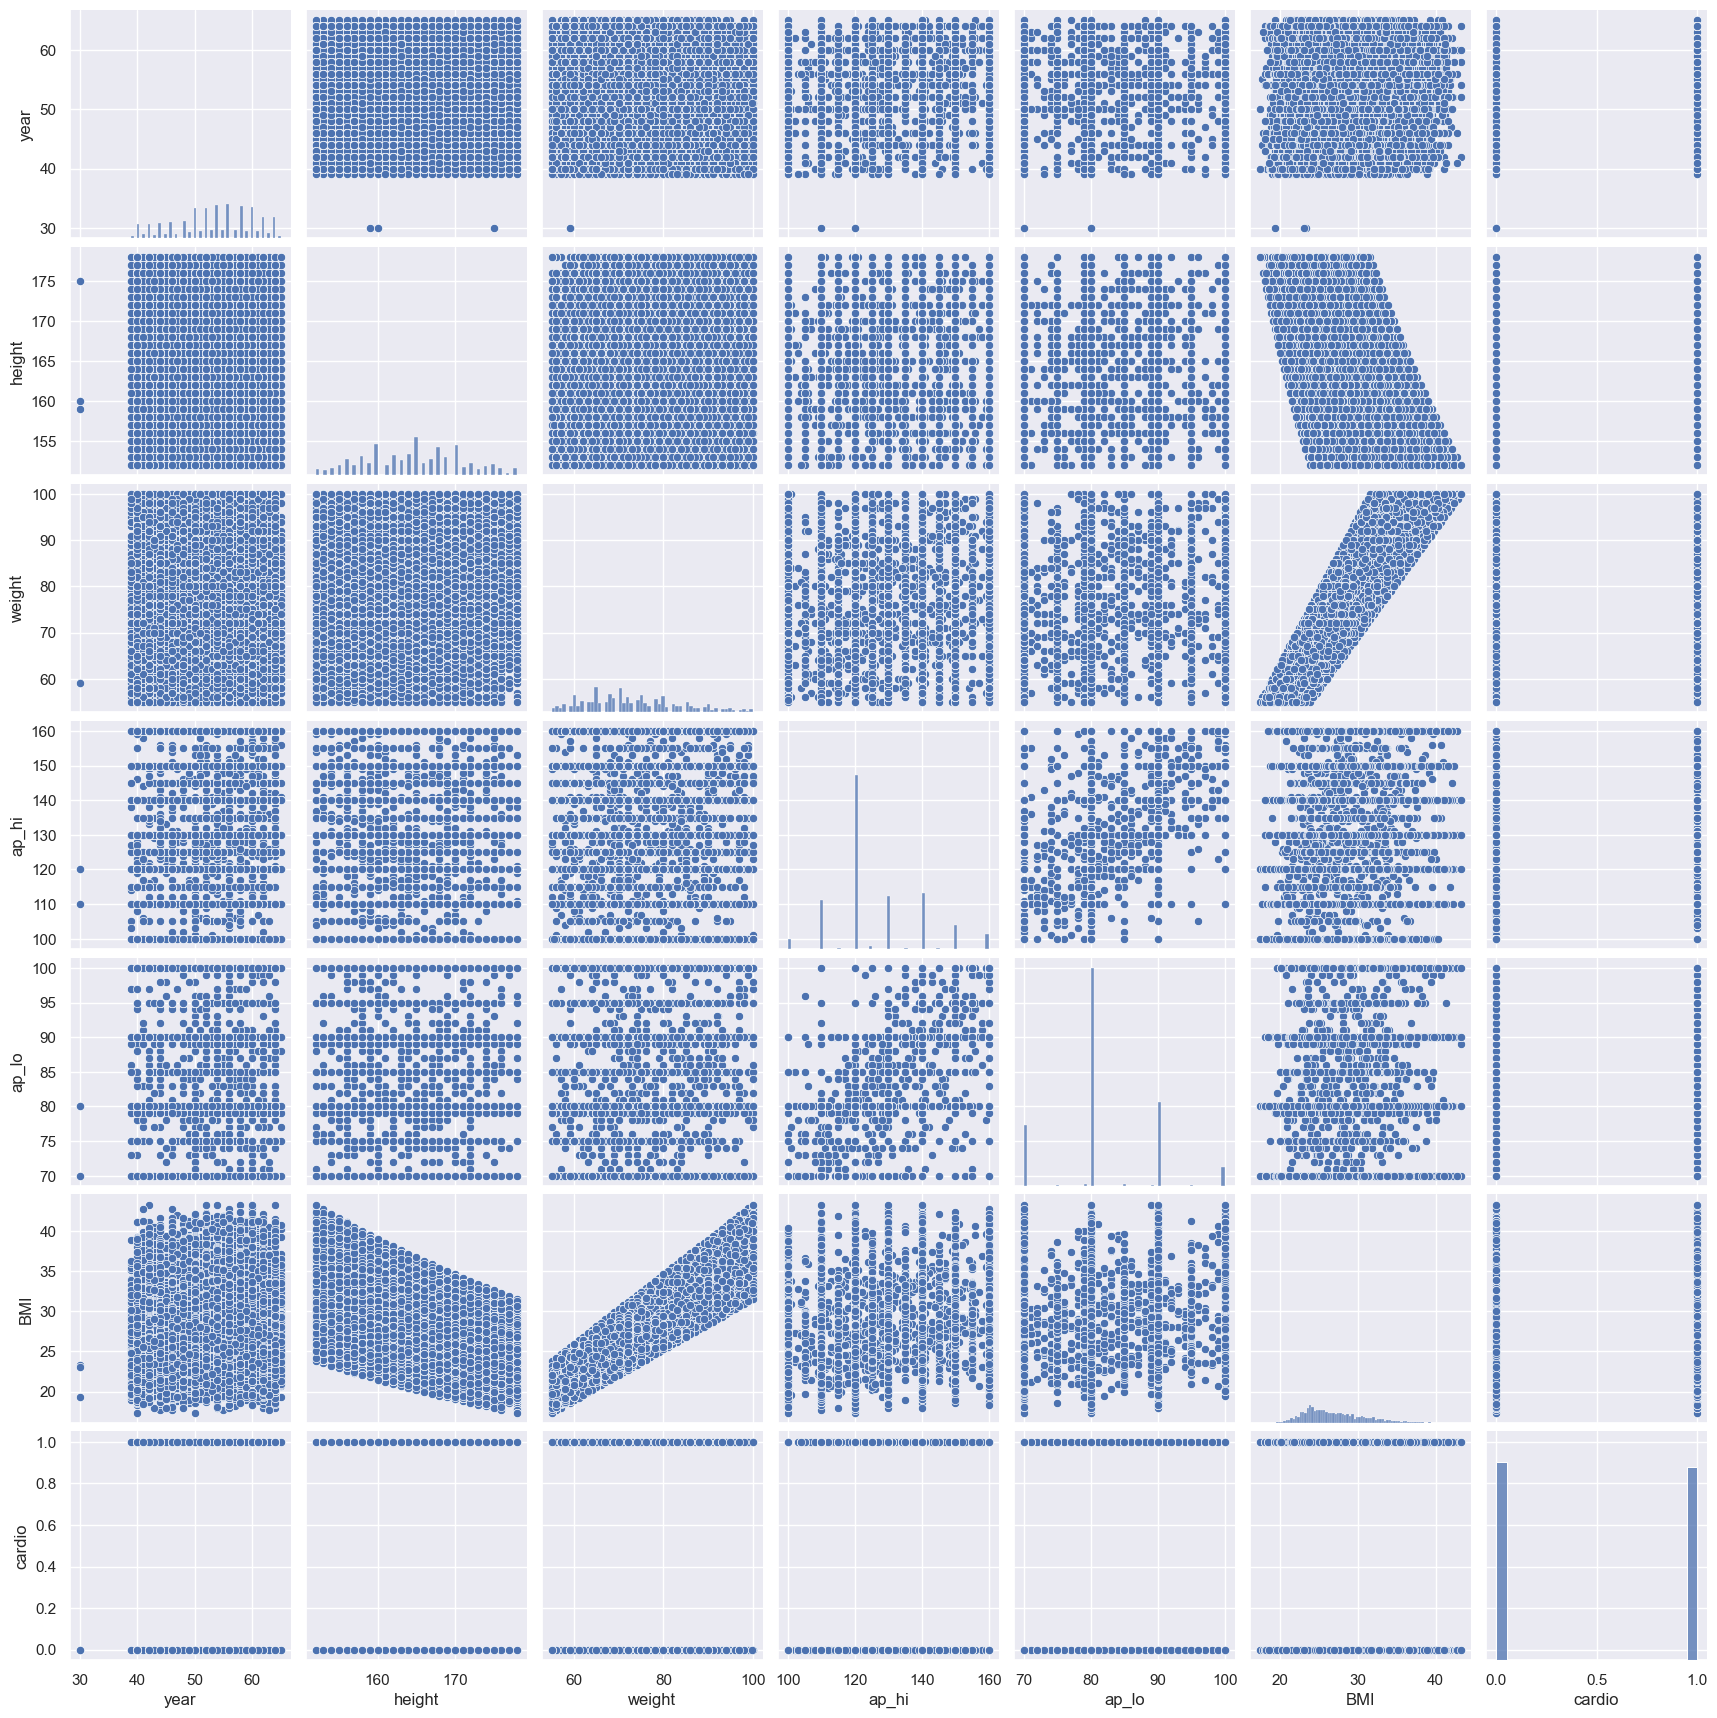

In [14]:
numericData = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'cardio']])
sb.pairplot(data = numericData)

<AxesSubplot: >

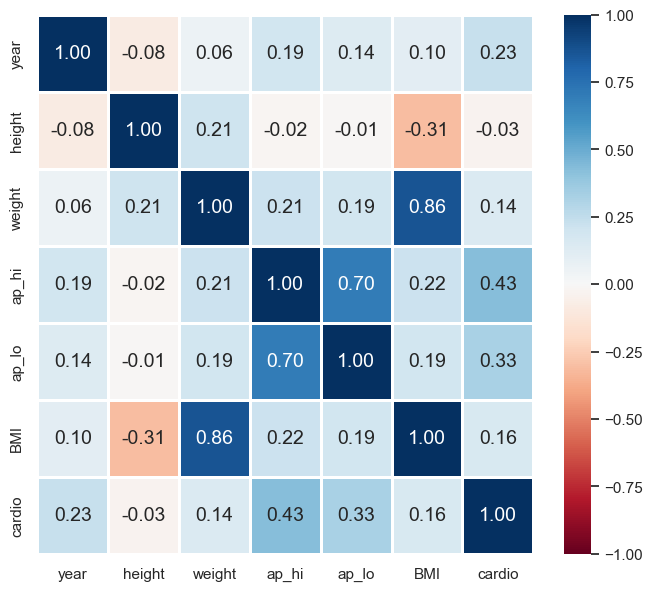

In [19]:
f, axes = plt.subplots(1, 1, figsize=(8, 7))
sb.heatmap(numericData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

<AxesSubplot: xlabel='year', ylabel='cardio_bool'>

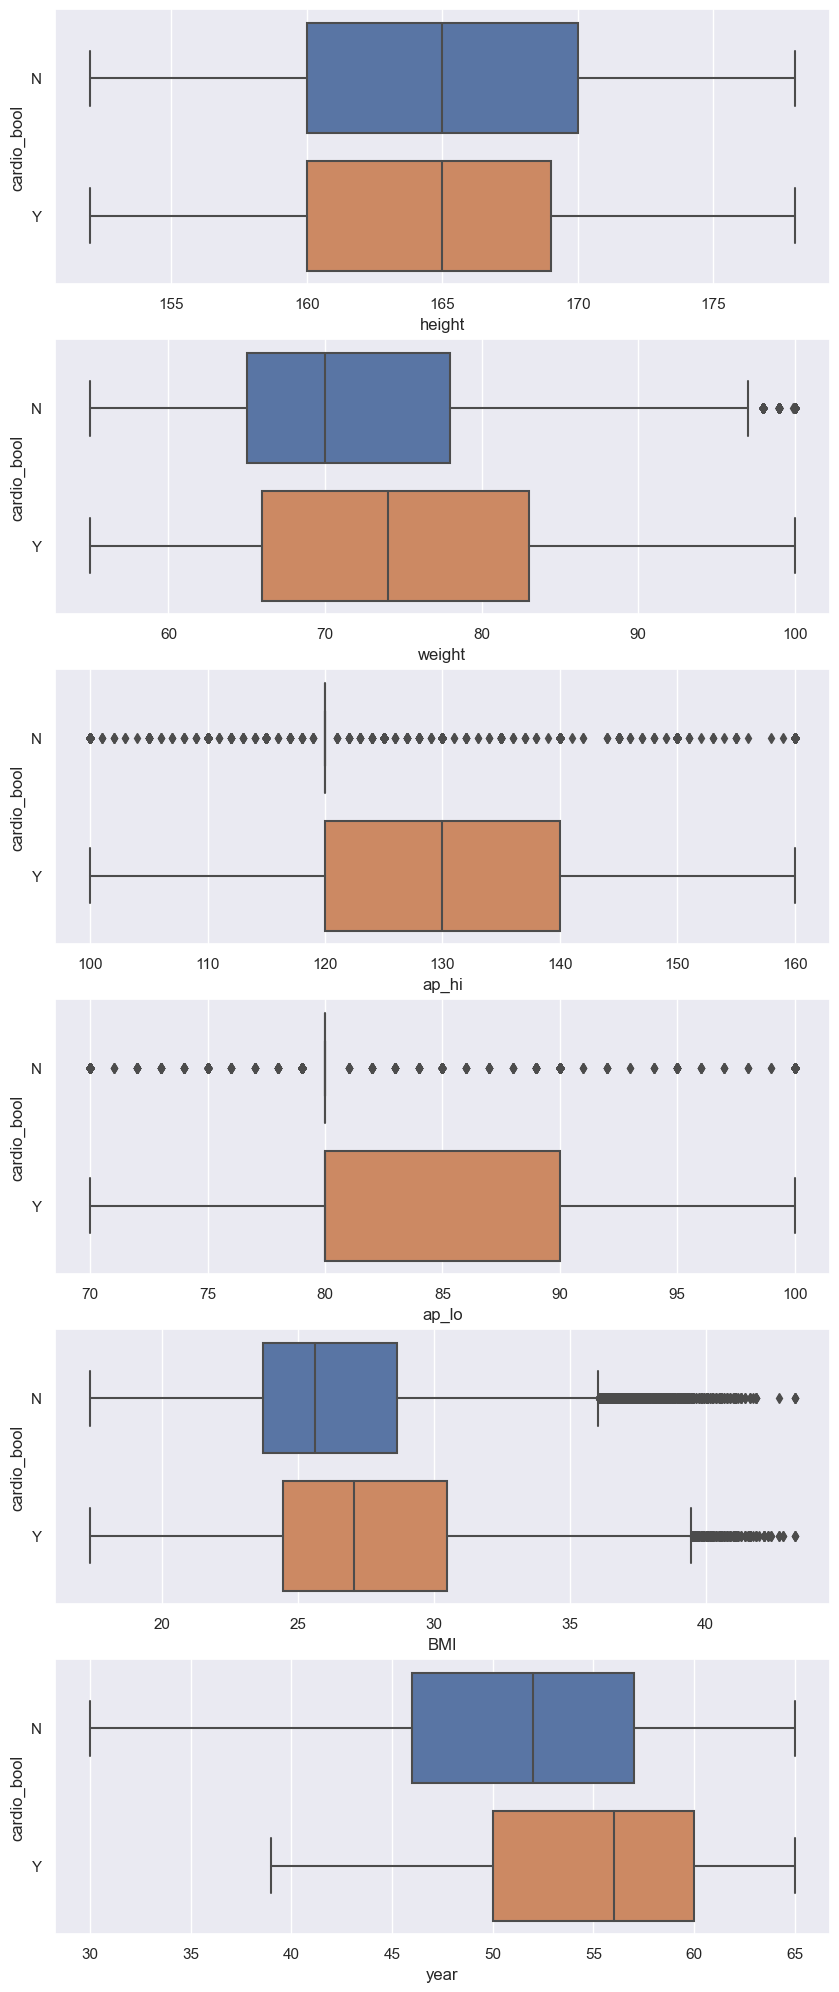

In [20]:
#gender height weight ap_hi ap_lo cholesterol gluc smoke alco active cardio BMI year

f, axes = plt.subplots(6, 1, figsize=(10,25))
sb.boxplot(x = 'height', y = 'cardio_bool', data = cardioData, ax = axes[0])
sb.boxplot(x = 'weight', y = 'cardio_bool', data = cardioData, ax = axes[1])
sb.boxplot(x = 'ap_hi', y = 'cardio_bool', data=cardioData, ax=axes[2])
sb.boxplot(x = 'ap_lo', y = 'cardio_bool', data = cardioData, ax = axes[3])
sb.boxplot(x = 'BMI', y = 'cardio_bool', data = cardioData, ax = axes[4])
sb.boxplot(x = 'year', y = 'cardio_bool', data = cardioData, ax = axes[5])